In [2]:
# import libraries
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})
RANDOM_SEED = 8927
np.random.seed(RANDOM_SEED)

## Load and merge datasets

In [4]:
dataset = pd.read_csv("../data/train.csv", names=['Store','Dept','Date','weeklySales','isHoliday'],sep=',', header=0)
features = pd.read_csv("../data/features.csv",sep=',', header=0,
                       names=['Store','Date','Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4',
                              'MarkDown5','CPI','Unemployment','IsHoliday']).drop(columns=['IsHoliday'])
stores = pd.read_csv("../data/stores.csv", names=['Store','Type','Size'],sep=',', header=0)
dataset = dataset.merge(stores, how='left').merge(features, how='left')

### Dept 5 and Store 5

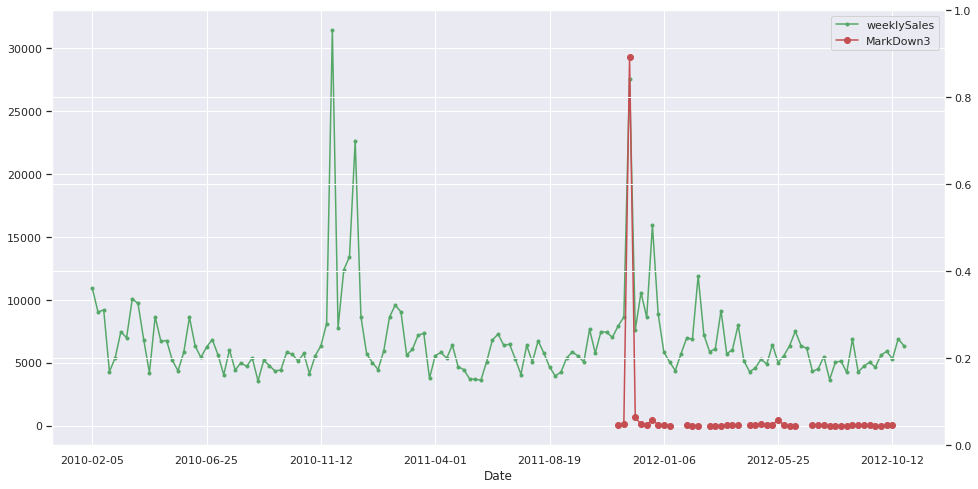

In [5]:
fig,ax = plt.subplots(figsize=(16,8))
ax_twinx = ax.twinx()
filter_store5_dept5 = (dataset['Store']==5) & (dataset['Dept']==5)
dataset[filter_store5_dept5].plot(x='Date',y='weeklySales',ax=ax,c='g',marker='.')
dataset[filter_store5_dept5].plot(x='Date',y='MarkDown3',ax=ax,c='r',marker='o')

## Visualizations

### Correlation plot

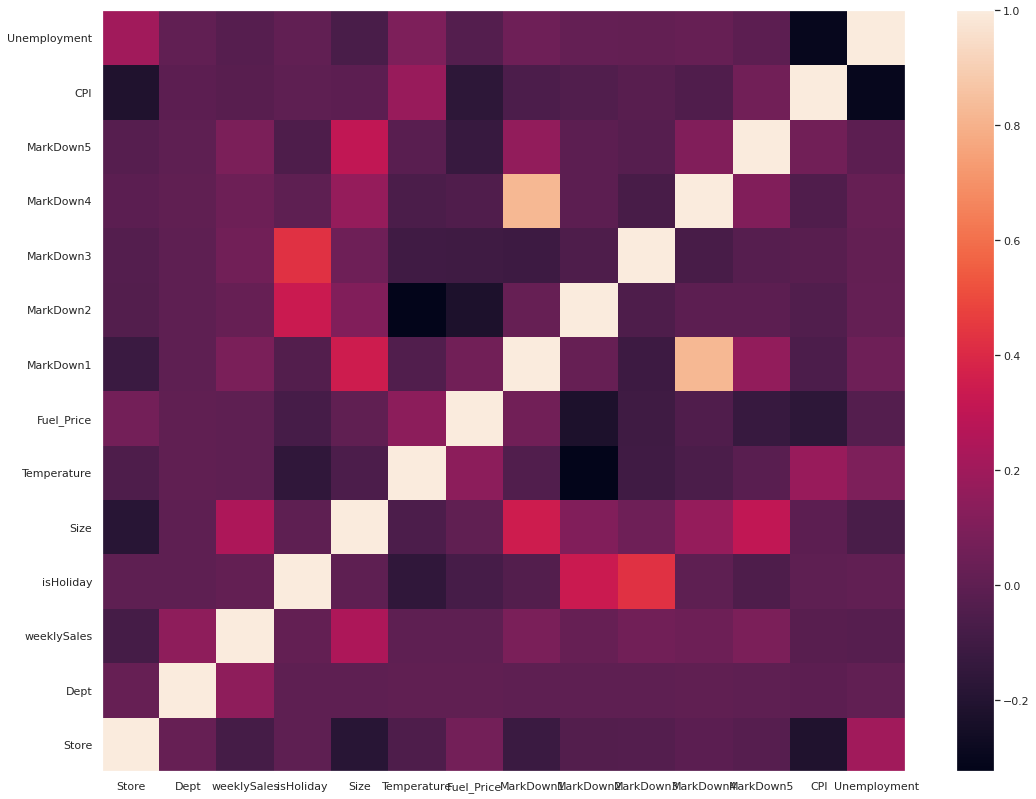

In [6]:
fig = plt.figure(figsize=(18, 14))
corr = dataset.corr()
c = plt.pcolor(corr)
plt.yticks(np.arange(0.5, len(corr.index), 1), corr.index)
plt.xticks(np.arange(0.5, len(corr.columns), 1), corr.columns)
fig.colorbar(c)

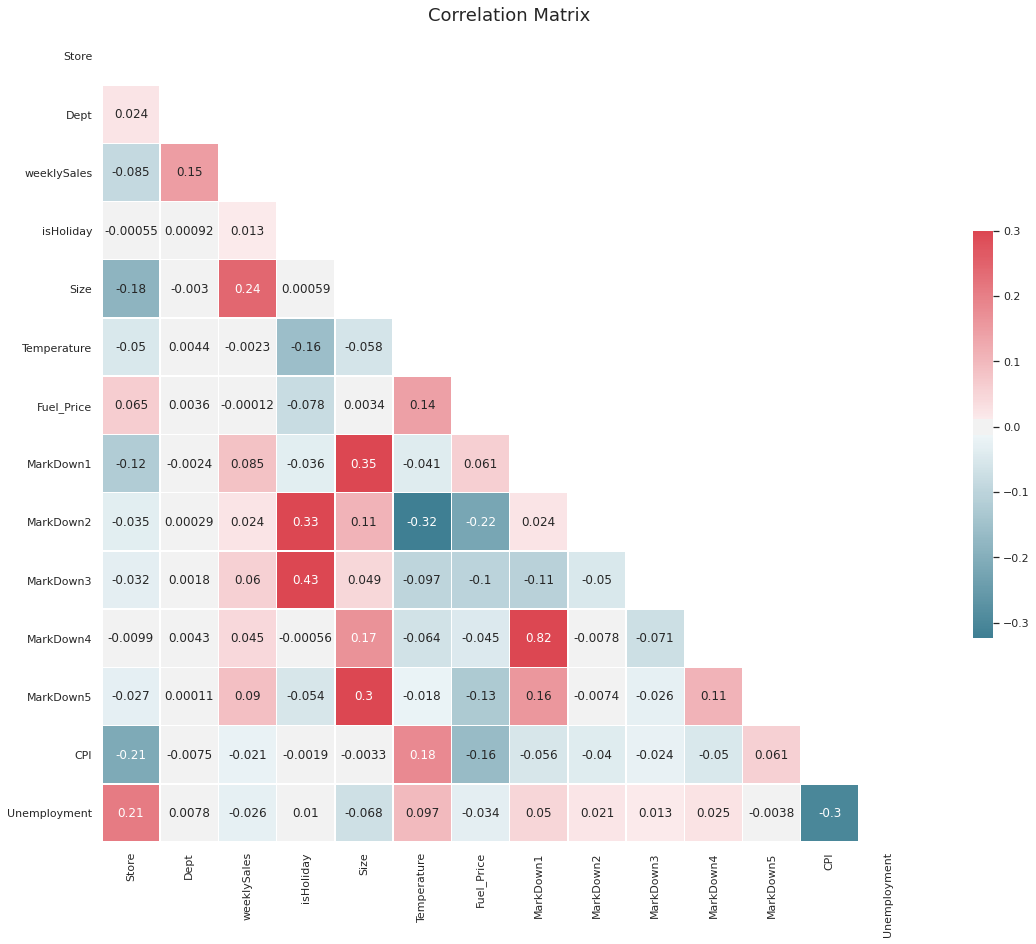

In [7]:
def plot_correlation(dataset):
    sns.set(style="white")

    corr = dataset.corr()

    mask = np.triu(np.ones_like(corr, dtype=np.bool))

    f, ax = plt.subplots(figsize=(20, 15))

    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    plt.title('Correlation Matrix', fontsize=18)

    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

    plt.show()
plot_correlation(dataset)

### Mean weekly sales plots

In [8]:
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['Year'] = dataset['Date'].dt.year
dataset['Week'] = dataset['Date'].dt.week

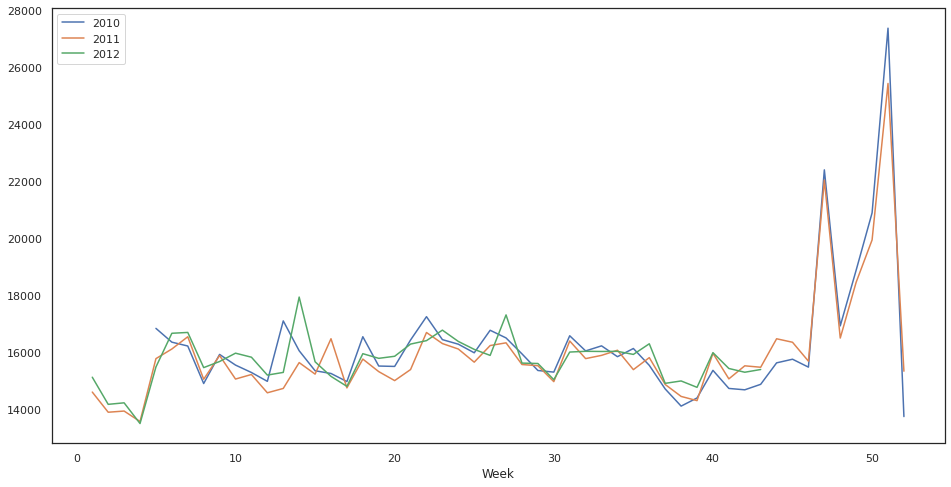

In [9]:
weekly_sales_2010 = dataset[dataset.Year==2010]['weeklySales'].groupby(dataset['Week']).mean()
weekly_sales_2011 = dataset[dataset.Year==2011]['weeklySales'].groupby(dataset['Week']).mean()
weekly_sales_2012 = dataset[dataset.Year==2012]['weeklySales'].groupby(dataset['Week']).mean()

fig,ax = plt.subplots(figsize=(16,8))
weekly_sales_2010.plot(ax=ax, label='2010')
weekly_sales_2011.plot(ax=ax,label='2011')
weekly_sales_2012.plot(ax=ax,label='2012')
ax.legend()

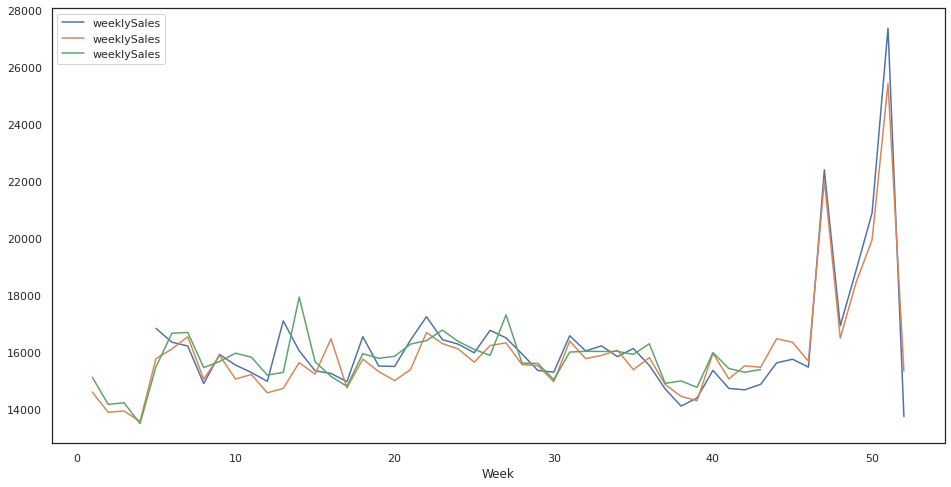

In [10]:
weekly_sales_2010 = dataset[dataset.Year==2010][['weeklySales','Week']].groupby('Week').mean()
weekly_sales_2011 = dataset[dataset.Year==2011][['weeklySales','Week']].groupby('Week').mean()
weekly_sales_2012 = dataset[dataset.Year==2012][['weeklySales','Week']].groupby('Week').mean()

fig,ax = plt.subplots(figsize=(16,8))
weekly_sales_2010.plot(ax=ax, label='2010')
weekly_sales_2011.plot(ax=ax,label='2011')
weekly_sales_2012.plot(ax=ax,label='2012')
ax.legend()

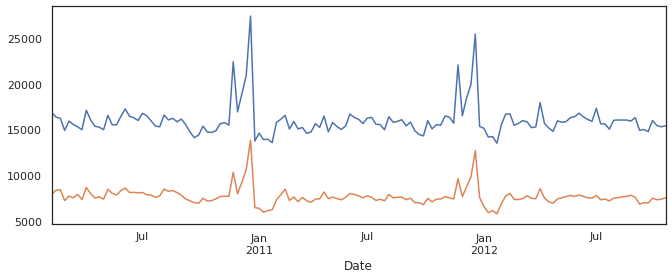

In [11]:
# Plot mean and median of weekly sales (averaged over stores and depts)
dataset.groupby('Date')['weeklySales'].mean().plot()
dataset.groupby('Date')['weeklySales'].median().plot()

### Mean sales per store

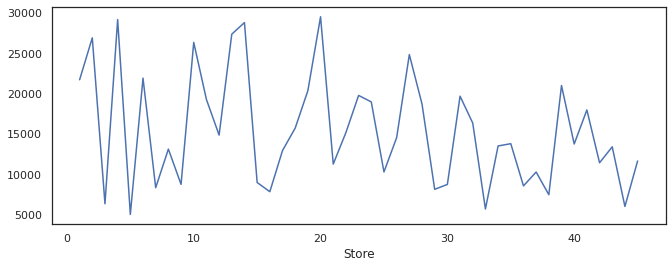

In [12]:
dataset.groupby('Store')['weeklySales'].mean().plot()

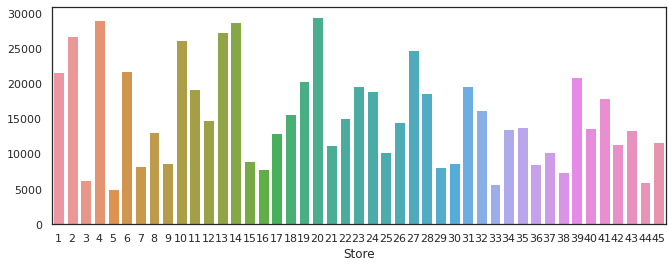

In [13]:
weeklySales_store = dataset.groupby('Store')['weeklySales'].mean()
fig,ax = plt.subplots()
sns.barplot(weeklySales_store.index,weeklySales_store.values,ax=ax)

### Box plot

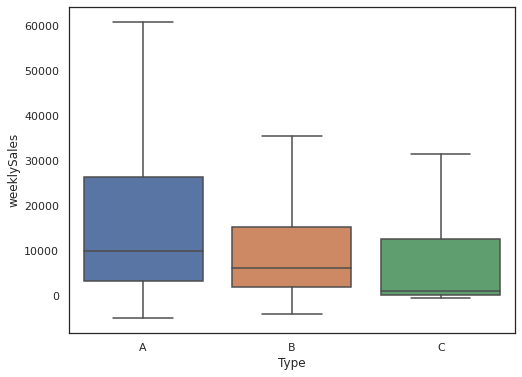

In [17]:
#boxplot for weekly sales for different types of stores :
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Type', y='weeklySales', data=dataset, showfliers=False)

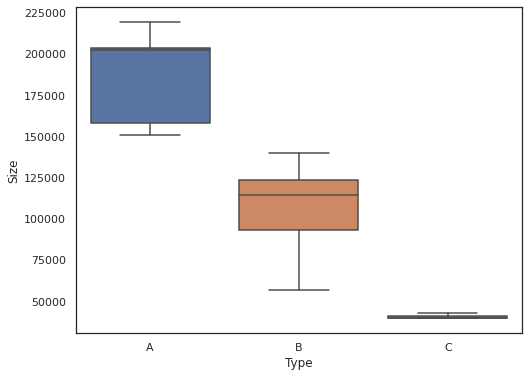

In [18]:
#boxplot for weekly sales for different types of stores :
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Type', y='Size', data=dataset, showfliers=False)

## Models

In [15]:
def knn():
    knn = KNeighborsRegressor(n_neighbors=10)
    return knn

def extraTreesRegressor():
    clf = ExtraTreesRegressor(n_estimators=100,max_features='auto', verbose=1, n_jobs=1)
    return clf

def randomForestRegressor():
    clf = RandomForestRegressor(n_estimators=100,max_features='log2', verbose=1)
    return clf

def svm():
    clf = SVR(kernel='rbf', gamma='auto')
    return clf

def nn():
    clf = MLPRegressor(hidden_layer_sizes=(10,),  activation='relu', verbose=3)
    return clf

def predict_(m, test_x):
    return pd.Series(m.predict(test_x))

def model_():
#     return knn()
    return extraTreesRegressor()
#     return svm()
#     return nn()
#     return randomForestRegressor()    

def train_(train_x, train_y):
    m = model_()
    m.fit(train_x, train_y)
    return m

def train_and_predict(train_x, train_y, test_x):
    m = train_(train_x, train_y)
    return predict_(m, test_x), m

In [16]:
def calculate_error(test_y, predicted, weights):
    return mean_absolute_error(test_y, predicted, sample_weight=weights)